Vamos a a hacer la nube de palabras para el dashboard 

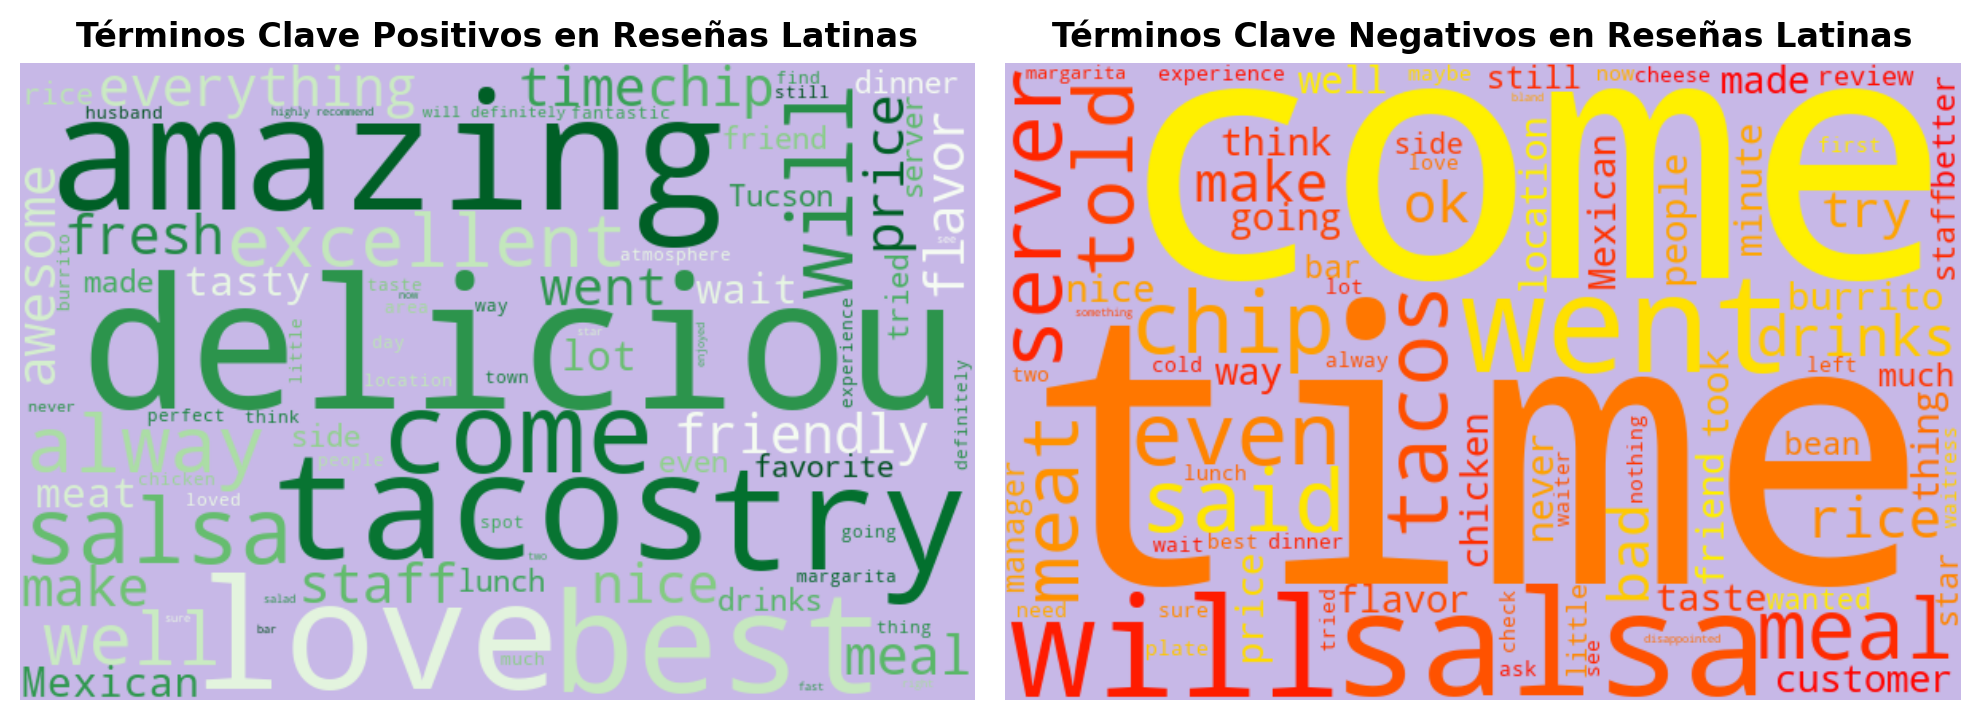

In [1]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Ruta del archivo
file_path = r"C:\Users\Usuario\Desktop\DATA SCIENCE\Data Restaurantes PF\df_review_filtered.csv"

# Cargamos los datos
df = pd.read_csv(file_path)

# Filtro reseñas positivas y negativas
positivas = df[df['sentiment'] == "Positive"]['text'].dropna()
negativas = df[df['sentiment'] == "Negative"]['text'].dropna()

# Combino el texto para generar las nubes
texto_positivas = " ".join(positivas)
texto_negativas = " ".join(negativas)

# podemos ajustar las stopwords que consideremos nosotros 
stopwords_personalizadas = STOPWORDS.union(
    {"food", "place", "restaurant", "good", "great", "service", "order", "ordered",
     "eat", "get", "got", "one", "table", "came", "menu", "know", "asked", 
     "say", "go", "take", "give", "want", "u", "drink", "us", "taco", "really", "back"}
)

# Aca es donde generamos las nubes de palabras
wordcloud_positiva = WordCloud(
    background_color="#c7b8e7",  # Color de fondo
    stopwords=stopwords_personalizadas,
    colormap="Greens",  # Colores cálidos para positivas
    max_words=80,  # Máximo número de palabras
    width=600,  # Ancho del gráfico
    height=400  # Alto del gráfico
).generate(texto_positivas)

wordcloud_negativa = WordCloud(
    background_color="#c7b8e7",  # Color de fondo
    stopwords=stopwords_personalizadas,
    colormap="autumn",  # Colores naranjas y rojos para negativas
    max_words=80,  # Máximo número de palabras
    width=600,  # Ancho del gráfico
    height=400  # Alto del gráfico
).generate(texto_negativas)

# Creo el gráfico
plt.figure(figsize=(10, 5), dpi=200)  # Ajustar tamaño y resolución

# Nube positiva
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positiva, interpolation="bilinear")
plt.axis("off")
plt.title("Términos Clave Positivos en Reseñas Latinas", fontsize=12, fontweight='bold')

# Nube negativa
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negativa, interpolation="bilinear")
plt.axis("off")
plt.title("Términos Clave Negativos en Reseñas Latinas", fontsize=12, fontweight='bold')

# Guardo la figura
plt.tight_layout()
plt.savefig("nube_ajustada_pequena.png", format="png", dpi=200)  # Guardar en menor tamaño
plt.show()
